In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import scanpy.external as sce
sc.logging.print_versions()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import palantir
import tkinter

scanpy==1.4.6 anndata==0.7.3 umap==0.4.1 numpy==1.18.1 scipy==1.3.3 pandas==0.25.3 scikit-learn==0.22.1 statsmodels==0.11.0 python-igraph==0.8.0


In [2]:
sct_normalized_matrix = '/Users/jamrute/Desktop/IWP/Myeloid/IWP_myeloid_SCT_normalized.txt'
counts = pd.read_csv(sct_normalized_matrix, sep=',', index_col=0).transpose()
counts = counts.sort_index()
counts

,HES4,ISG15,TNFRSF18,TNFRSF4,TNFRSF14,SMIM1,KCNAB2,ESPN,UTS2,TNFRSF9,...,SLC37A1,PDXK,CSTB,ICOSLG,TRPM2,PTTG1IP,ITGB2,COL6A1,COL6A2,S100B
AAACCTGAGCTAAACA-1,-0.258451,-1.761417,-0.174485,-0.516613,-1.262607,-1.248091,3.176281,-0.263067,-0.166968,-0.180827,...,-2.572091,3.758678,1.356797,-0.217262,2.556205,-1.490149,1.526159,-0.397865,-0.410159,10.473440
AAACCTGAGCTAAGAT-1,-0.523574,-0.052787,0.043254,4.213640,-0.287131,3.243514,-0.393620,-0.403887,-0.033710,-0.046991,...,-0.031921,0.808392,-0.149512,-0.034148,-0.156251,0.475811,-0.067567,-0.439071,-0.443793,0.706104
AAACCTGAGTTCCACA-1,-0.430447,-0.785351,-0.012762,-0.088768,-0.406460,-1.070465,-0.366855,-0.427364,-0.064724,-0.085843,...,-0.411558,-0.684312,0.225992,-0.043926,0.011632,-0.927874,-0.619357,-0.351613,-0.383065,0.049631
AAACCTGCAAACAACA-1,-0.421387,-1.012049,0.003069,-0.047521,0.884632,-1.328225,-0.683238,-0.286477,-0.054368,-0.059612,...,-0.650210,-0.486557,-0.759808,-0.089638,-0.422207,-1.204161,-1.540634,-0.416710,-0.401151,-1.187323
AAACCTGCAAGAGTCG-1,-0.480363,-0.955931,0.025512,-0.018094,1.019227,0.113005,-0.702047,-0.249445,-0.032168,-0.042302,...,-0.701479,-1.236670,-0.232970,-0.083490,-0.496407,0.624223,-1.588749,-0.510599,-0.497864,-1.325835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTCCCGACA-1,-0.259797,0.238384,-0.000965,0.047040,-0.055732,-1.513923,-0.059047,-0.498802,-0.080310,-0.075210,...,0.647391,-0.572657,1.562166,-0.012226,0.245758,1.086272,0.142427,-0.012784,-0.007647,0.739809
TTTGTCAGTGCTTCTC-1,-0.142052,-1.129220,-0.024417,-0.035360,-0.471617,-0.165645,-0.855483,-0.132375,-0.080561,-0.049698,...,-0.580093,0.044487,-1.760541,-0.140457,-0.695735,0.131821,-2.281096,-0.126063,-0.040387,-2.180552
TTTGTCATCGCGGATC-1,-0.119745,-1.321283,-0.068986,-0.154698,-0.584468,1.301061,-0.818321,-0.202715,-0.108916,-0.088682,...,0.468919,-0.403127,-1.901115,-0.143121,-0.505807,-0.466855,-2.148311,-0.096713,-0.042151,-1.763816
TTTGTCATCTACTTAC-1,-0.239676,-1.182870,-0.045495,-0.146224,-0.566200,-1.636480,-0.718777,-0.225029,-0.081701,-0.079786,...,-0.918362,-0.016828,-1.971007,-0.114054,-0.410696,0.472204,-1.810680,-0.243746,-0.222006,-1.381360


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:403: RuntimeWarning: invalid value encountered in greater_equal
  keep = (a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:404: RuntimeWarning: invalid value encountered in less_equal
  keep &= (a <= last_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.
findfont: Font famil

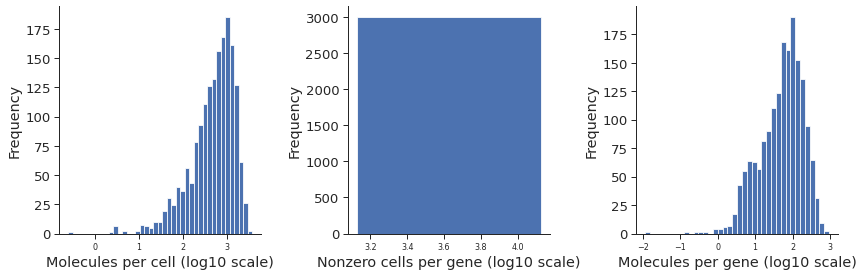

In [3]:
fig, ax = palantir.plot.plot_molecules_per_cell_and_gene(counts)
plt.savefig('molecules_per_cell_and_gene.png')

In [4]:
pca_projections, _ = palantir.utils.run_pca(counts)
dm_res = palantir.utils.run_diffusion_maps(pca_projections)
ms_data = palantir.utils.determine_multiscale_space(dm_res)
tsne = palantir.utils.run_tsne(ms_data)

Determing nearest neighbor graph...


/opt/anaconda3/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:355: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 11000. The TBB threading layer is disabled.
  warnings.warn(problem)
/opt/anaconda3/lib/python3.7/site-packages/scanpy/neighbors/__init__.py:121: FutureWarning: This location for 'distances' is deprecated. It has been moved to .obsp[distances], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['distances'] = neighbors.distances
/opt/anaconda3/lib/python3.7/site-packages/scanpy/neighbors/__init__.py:122: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['connectivities'] = neighbors.connectivities
/opt/anaconda3/lib/python3.7/site-packages/palantir/utils.py:40: FutureWarning: This location f

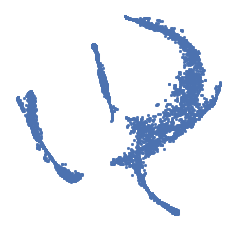

In [5]:
fig, ax = palantir.plot.plot_tsne(tsne)
plt.savefig('tsne.png')

In [11]:
fig, ax = palantir.plot.plot_tsne_by_cell_sizes(counts, tsne)
plt.savefig('tsne_counts.png')

In [6]:
imp_df = palantir.utils.run_magic_imputation(counts, dm_res)

findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.


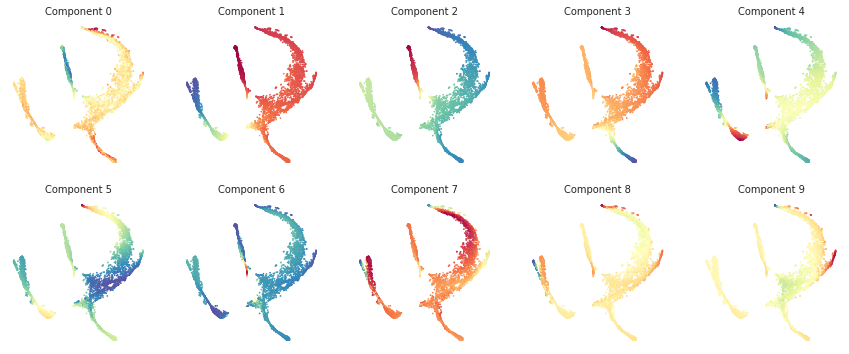

In [7]:
palantir.plot.plot_diffusion_components(tsne, dm_res)
plt.savefig('tsne_diff_components.png')

In [8]:
clusters = palantir.utils.determine_cell_clusters(pca_projections)

Finding 50 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 2.837461233139038 seconds
Jaccard graph constructed in 2.17878794670105 seconds
Wrote graph to binary file in 0.8450591564178467 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.795367
Louvain completed 21 runs in 1.9813199043273926 seconds
PhenoGraph complete in 7.880039215087891 seconds


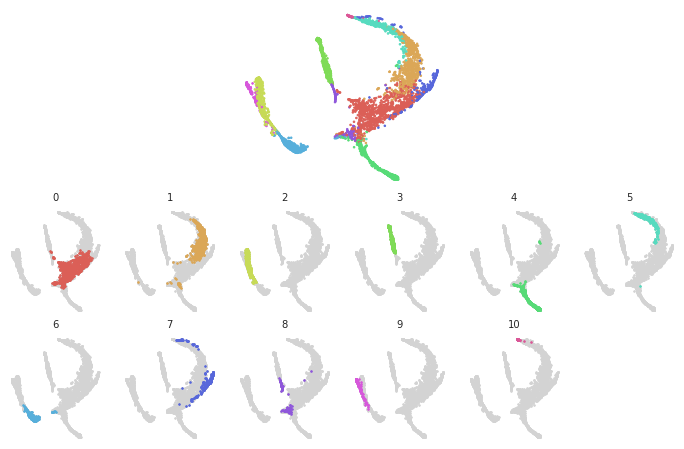

In [9]:
palantir.plot.plot_cell_clusters(tsne, clusters)
plt.savefig('tsne_clustering.png')

In [13]:
meta_data = pd.read_csv('/Users/jamrute/Desktop/IWP/Myeloid/IWP_myeloid_meta.csv', index_col=0)
meta_data = meta_data.sort_index()
meta_data

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,nCount_SCT,nFeature_SCT,S.Score,G2M.Score,Phase,old.ident,SCT_snn_res.0.3,SCT_snn_res.0.4,SCT_snn_res.0.8,SCT_snn_res.0.6,SCT_snn_res.0.7,SCT_snn_res.0.5,seurat_clusters,annotated_names
AAACCTGAGCTAAACA-1,IWP,29893,4551,3.632958,27214,4549,-0.361595,-0.427776,G1,IWP,4,4,6,5,5,5,5,Macrophage
AAACCTGAGCTAAGAT-1,IWP,51295,6329,3.883419,27129,5766,0.233071,0.722504,G2M,IWP,2,2,11,10,11,2,2,Mast
AAACCTGAGTTCCACA-1,IWP,32209,5007,3.145084,27206,5006,0.177362,0.353301,G2M,IWP,0,1,0,1,0,1,1,1
AAACCTGCAAACAACA-1,IWP,38750,5301,4.363871,26700,5221,0.054995,0.464847,G2M,IWP,0,1,0,1,0,1,1,1
AAACCTGCAAGAGTCG-1,IWP,32279,4886,4.575730,27112,4885,-0.029484,0.683213,G2M,IWP,0,1,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTCCCGACA-1,IWP,52818,5737,3.095536,26172,5015,0.633220,0.000137,S,IWP,0,1,0,1,0,1,1,1
TTTGTCAGTGCTTCTC-1,IWP,35505,4981,5.351359,26912,4957,0.160639,-0.083014,S,IWP,0,1,0,1,0,1,1,1
TTTGTCATCGCGGATC-1,IWP,30888,4154,4.561642,26941,4153,0.132921,-0.312705,S,IWP,1,0,1,0,1,0,0,RBCs
TTTGTCATCTACTTAC-1,IWP,21750,4173,4.229885,26359,4172,0.032232,-0.000947,S,IWP,0,1,0,1,0,1,1,1


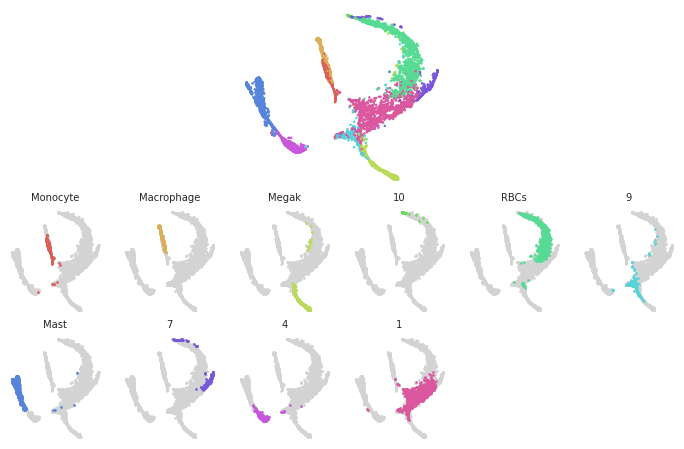

In [14]:
palantir.plot.plot_cell_clusters(tsne, meta_data["annotated_names"])
plt.savefig('tsne_seurat_clusters.png')

In [16]:
meta_data[meta_data.annotated_names=="9"]

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,nCount_SCT,nFeature_SCT,S.Score,G2M.Score,Phase,old.ident,SCT_snn_res.0.3,SCT_snn_res.0.4,SCT_snn_res.0.8,SCT_snn_res.0.6,SCT_snn_res.0.7,SCT_snn_res.0.5,seurat_clusters,annotated_names
AAAGTAGAGACTTTCG-1,IWP,17673,3952,5.618740,25666,3996,-0.364523,-0.450954,G1,IWP,3,3,10,9,10,9,9,9
AAGACCTCACGGACAA-1,IWP,16668,3484,6.131509,26767,3549,0.402863,-0.064418,S,IWP,3,3,10,9,10,9,9,9
AAGGAGCTCGTTTATC-1,IWP,9245,2693,2.271498,25229,3430,-0.283722,-0.320563,G1,IWP,3,3,10,9,10,9,9,9
AAGGTTCGTGCAACTT-1,IWP,13213,3010,3.186256,25339,3376,-0.293050,-0.320249,G1,IWP,3,3,10,9,10,9,9,9
AATCCAGAGCCCGAAA-1,IWP,18558,3100,4.784998,27049,3137,0.410803,0.066617,S,IWP,3,3,10,9,10,9,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGGCAAAGATGAGAG-1,IWP,24240,4296,3.910891,26259,4295,0.174321,-0.227891,S,IWP,3,3,10,9,10,9,9,9
TTGGCAAGTTTCGCTC-1,IWP,32479,5350,4.867761,27510,5346,-0.112526,-0.463287,G1,IWP,3,3,10,9,10,9,9,9
TTTACTGTCAACGCTA-1,IWP,14972,3578,4.708790,26295,3721,0.029957,-0.341920,S,IWP,3,3,10,9,10,9,9,9
TTTATGCAGTACGCGA-1,IWP,30215,4667,2.955486,27294,4666,-0.382448,-0.411136,G1,IWP,3,3,10,9,10,9,9,9


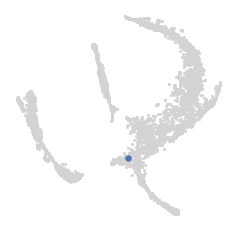

In [18]:
start_cell = "AAGACCTCACGGACAA-1"
palantir.plot.highlight_cells_on_tsne(tsne, [start_cell])
plt.savefig('start_cell.png')

In [23]:
pr_res = palantir.core.run_palantir(ms_data, start_cell, num_waypoints=1200)

Sampling and flocking waypoints...
Time for determining waypoints: 0.010892268021901448 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...
Time for shortest paths: 0.09175628423690796 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9998
Correlation at iteration 2: 1.0000
Entropy and branch probabilities...
Markov chain construction...
Identification of terminal states...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


In [24]:
lst = []
for i in list(pr_res.branch_probs.columns):
    print(meta_data.annotated_names[i])
    lst.append(meta_data.annotated_names[i])

pr_res.branch_probs.columns = lst
pr_res.branch_probs = pr_res.branch_probs.loc[:, lst]

4
Macrophage
Mast
10
Megak


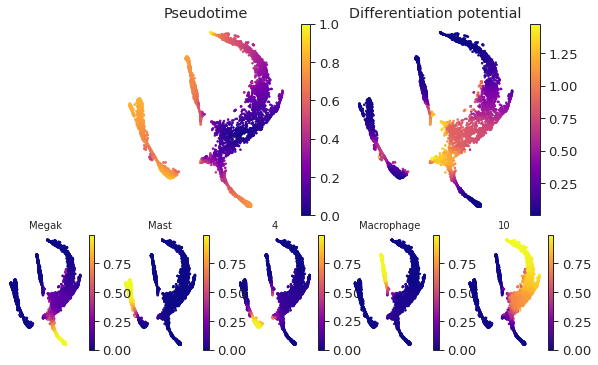

In [25]:
palantir.plot.plot_palantir_results(pr_res, tsne)
plt.savefig('palantir_summary.png')

In [26]:
df = pd.DataFrame()
df = pr_res.branch_probs
df['pseudotime'] = np.array(pr_res.pseudotime)
df['entropy'] = np.array(pr_res.entropy)
df['ClusterName'] = list(meta_data.annotated_names)
df['tsne_clusters'] = list(clusters)
df['ClusterName'] = df['ClusterName'].astype("category")
df['tsne_clusters'] = df['tsne_clusters'].astype("category")

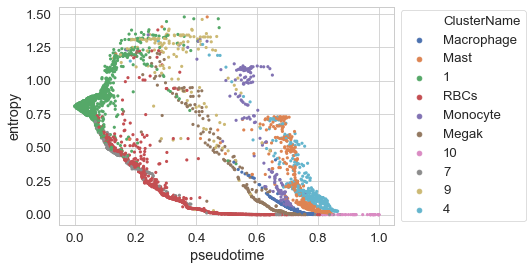

In [29]:
ax = sns.scatterplot(x="pseudotime", y="entropy", hue="ClusterName", data=df, s=10,linewidth=0)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.savefig('pseudotime_entropy_seuratClusters.png')
plt.show()

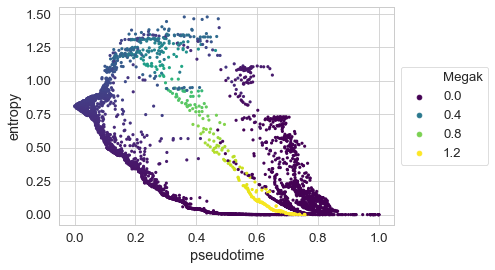

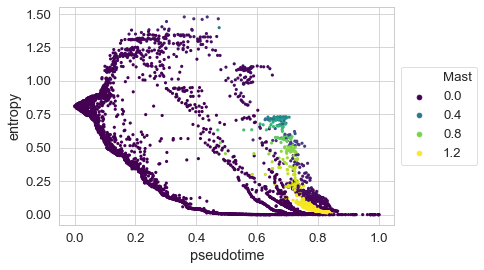

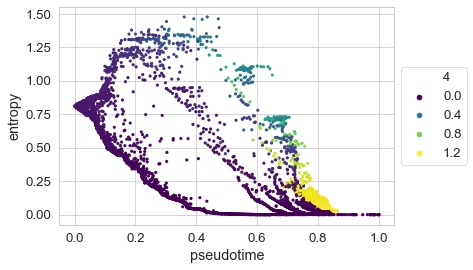

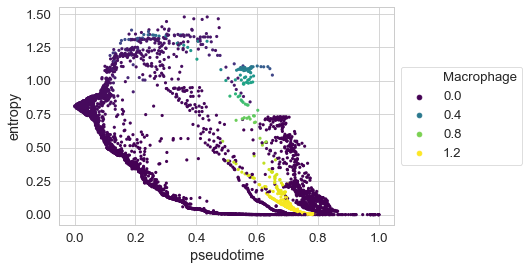

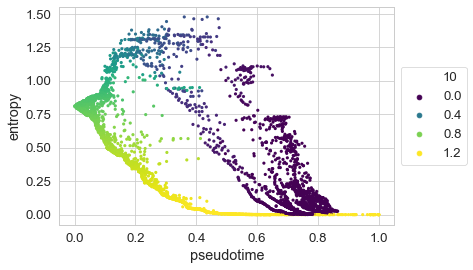

In [32]:
ax = sns.scatterplot(x="pseudotime", y="entropy", hue="Megak", data=df, s=10,linewidth=0, palette = plt.cm.viridis)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.savefig('pseudotime_entropy_Megak_branch.png')
plt.show()

ax = sns.scatterplot(x="pseudotime", y="entropy", hue="Mast", data=df, s=10,linewidth=0, palette = plt.cm.viridis)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.savefig('pseudotime_entropy_Mast_branch.png')
plt.show()

ax = sns.scatterplot(x="pseudotime", y="entropy", hue="4", data=df, s=10,linewidth=0, palette = plt.cm.viridis)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.savefig('pseudotime_entropy_4_branch.png')
plt.show()

ax = sns.scatterplot(x="pseudotime", y="entropy", hue="Macrophage", data=df, s=10,linewidth=0, palette = plt.cm.viridis)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.savefig('pseudotime_entropy_Macrophage_branch.png')
plt.show()

ax = sns.scatterplot(x="pseudotime", y="entropy", hue="10", data=df, s=10,linewidth=0, palette = plt.cm.viridis)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.savefig('pseudotime_entropy_10_branch.png')
plt.show()

In [3]:
IWP_seurat = sc.read_loom('/Users/jamrute/Documents/Graduate_School/Thesis_Lab/Lavine_Projects/IWP/IWP_CellCycleRegressed/Myeloid/IWP_myeloid.loom')
IWP_seurat

/opt/anaconda3/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:355: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 11000. The TBB threading layer is disabled.
  warnings.warn(problem)
/opt/anaconda3/lib/python3.7/site-packages/loompy/loom_layer.py:123: RuntimeWarning: invalid value encountered in not_equal
  nonzeros = np.where(vals != 0)


AnnData object with n_obs × n_vars = 4217 × 18966
    obs: 'ClusterID', 'ClusterName', 'G2M_Score', 'Phase', 'SCT_snn_res_0_3', 'SCT_snn_res_0_4', 'SCT_snn_res_0_5', 'SCT_snn_res_0_6', 'SCT_snn_res_0_7', 'SCT_snn_res_0_8', 'S_Score', 'nCount_RNA', 'nCount_SCT', 'nFeature_RNA', 'nFeature_SCT', 'old_ident', 'orig_ident', 'percent_mt', 'seurat_clusters'
    var: 'Selected', 'sct_detection_rate', 'sct_gmean', 'sct_residual_variance', 'sct_variable', 'sct_variance'
    obsm: 'pca_cell_embeddings', 'umap_cell_embeddings'
    varm: 'pca_feature_loadings'
    layers: 'norm_data', 'scale_data'

In [5]:
IWP_seurat.obsm['X_pca'] = IWP_seurat.obsm['pca_cell_embeddings']
IWP_seurat.obsm['X_umap'] = IWP_seurat.obsm['umap_cell_embeddings']

In [6]:
IWP_seurat.obs['pseudotime'] = np.zeros(len(df['pseudotime']))
IWP_seurat.obs['entropy'] = np.zeros(len(df['entropy']))

IWP_seurat.obs['4_branch'] = np.zeros(len(df['4']))
IWP_seurat.obs['Mac_branch'] = np.zeros(len(df['Macrophage']))
IWP_seurat.obs['Mast_branch'] = np.zeros(len(df['Mast']))
IWP_seurat.obs['10_branch'] = np.zeros(len(df['10']))
IWP_seurat.obs['Megak_branch'] = np.zeros(len(df['Megak']))

In [7]:
sorted_cells = list(df.index)
for i in range(len(IWP_seurat.obs['pseudotime'])):
    IWP_seurat.obs['pseudotime'][sorted_cells[i]] = list(df['pseudotime'])[i]
    IWP_seurat.obs['entropy'][sorted_cells[i]] = list(df['entropy'])[i]
    IWP_seurat.obs['4_branch'][sorted_cells[i]] = list(df['4'])[i]
    IWP_seurat.obs['Mac_branch'][sorted_cells[i]] = list(df['Macrophage'])[i]
    IWP_seurat.obs['Mast_branch'][sorted_cells[i]] = list(df['Mast'])[i]
    IWP_seurat.obs['10_branch'][sorted_cells[i]] = list(df['10'])[i]
    IWP_seurat.obs['Megak_branch'][sorted_cells[i]] = list(df['Megak'])[i]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [14]:
IWP_seurat.obs

,ClusterID,ClusterName,G2M_Score,Phase,SCT_snn_res_0_3,SCT_snn_res_0_4,SCT_snn_res_0_5,SCT_snn_res_0_6,SCT_snn_res_0_7,SCT_snn_res_0_8,...,orig_ident,percent_mt,seurat_clusters,pseudotime,entropy,4_branch,Mac_branch,Mast_branch,10_branch,Megak_branch
AAACCTGAGCTAAACA-1,6,Macrophage,-0.427776,G1,4,4,5,5,5,6,...,IWP,3.632957,5,0.769801,0.004814,0.000000,0.999485,0.000000,0.000000,0.000000
AAACCTGAGCTAAGAT-1,3,Mast,0.722504,G2M,2,2,2,10,11,11,...,IWP,3.883420,2,0.813079,0.018824,0.000000,0.000000,0.997308,0.000000,0.000000
AAACCTGAGTTCCACA-1,2,1,0.353301,G2M,0,1,1,1,0,0,...,IWP,3.145084,1,0.016230,0.827996,0.065338,0.025567,0.000000,0.736980,0.165444
AAACCTGCAAACAACA-1,2,1,0.464847,G2M,0,1,1,1,0,0,...,IWP,4.363871,1,0.037329,0.836126,0.066453,0.025890,0.000000,0.732860,0.168006
AAACCTGCAAGAGTCG-1,2,1,0.683213,G2M,0,1,1,1,0,0,...,IWP,4.575730,1,0.089984,0.939092,0.081577,0.029910,0.000000,0.675478,0.204682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTCCCGACA-1,2,1,0.000137,S,0,1,1,1,0,0,...,IWP,3.095536,1,0.123736,1.083205,0.096672,0.059567,0.000000,0.601500,0.232755
TTTGTCAGTGCTTCTC-1,2,1,-0.083014,S,0,1,1,1,0,0,...,IWP,5.351359,1,0.060545,0.806503,0.062554,0.024516,0.000000,0.747507,0.159041
TTTGTCATCGCGGATC-1,1,RBCs,-0.312705,S,1,0,0,0,1,1,...,IWP,4.561642,0,0.267410,0.192338,0.000000,0.000000,0.000000,0.962089,0.026935
TTTGTCATCTACTTAC-1,2,1,-0.000947,S,0,1,1,1,0,0,...,IWP,4.229885,1,0.056778,0.740408,0.054317,0.021713,0.000000,0.778379,0.140074


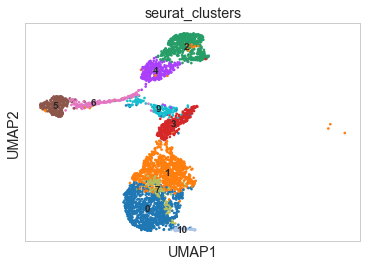

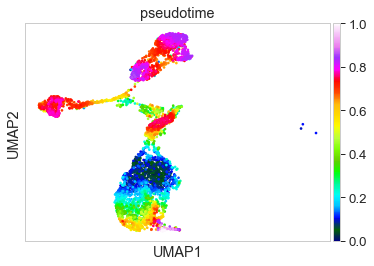

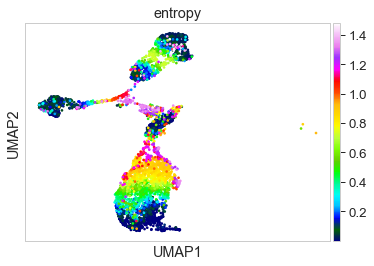

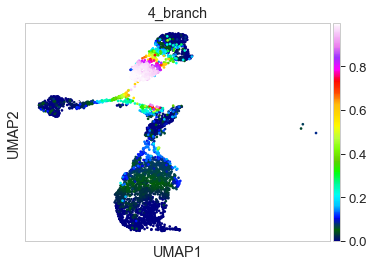

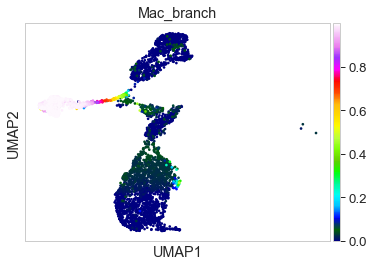

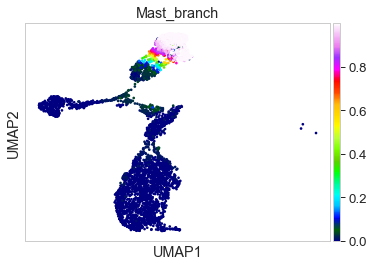

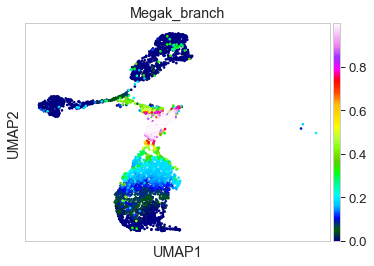

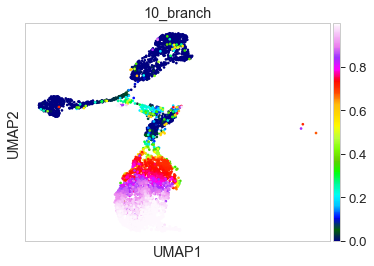

In [17]:
sc.pl.umap(IWP_seurat, color=['seurat_clusters'], 
           palette=sc.pl.palettes.vega_20_scanpy, legend_loc='on data', cmap='plasma')

sc.pl.umap(IWP_seurat, color=['pseudotime'], 
           palette=sc.pl.palettes.vega_20_scanpy, legend_loc='on data', cmap='gist_ncar')

sc.pl.umap(IWP_seurat, color=['entropy'], 
           palette=sc.pl.palettes.vega_20_scanpy, legend_loc='on data', cmap='gist_ncar')

sc.pl.umap(IWP_seurat, color=['4_branch'], 
           palette=sc.pl.palettes.vega_20_scanpy, legend_loc='on data', cmap='gist_ncar')

sc.pl.umap(IWP_seurat, color=['Mac_branch'], 
           palette=sc.pl.palettes.vega_20_scanpy, legend_loc='on data', cmap='gist_ncar')

sc.pl.umap(IWP_seurat, color=['Mast_branch'], 
           palette=sc.pl.palettes.vega_20_scanpy, legend_loc='on data', cmap='gist_ncar')

sc.pl.umap(IWP_seurat, color=['Megak_branch'], 
           palette=sc.pl.palettes.vega_20_scanpy, legend_loc='on data', cmap='gist_ncar')

sc.pl.umap(IWP_seurat, color=['10_branch'], 
           palette=sc.pl.palettes.vega_20_scanpy, legend_loc='on data', cmap='gist_ncar')

In [41]:
pca_projections.to_csv('/Users/jamrute/Desktop/IWP_myeloid_pca_projections.csv', index=True)
ms_data.to_csv('/Users/jamrute/Desktop/IWP_myeloid_ms_data.csv', index=True)
tsne.to_csv('/Users/jamrute/Desktop/IWP_myeloid_tsne.csv', index=True)
df.to_csv('/Users/jamrute/Desktop/IWP_myeloid_palantir_meta_data.csv', index=True)

In [4]:
df = pd.read_csv('/Users/jamrute/Documents/Graduate_School/Thesis_Lab/Lavine_Projects/IWP/IWP_CellCycleRegressed/Myeloid_palantir/IWP_myeloid_palantir_meta_data.csv', index_col=0)
df = df.sort_index()
df

,4,Macrophage,Mast,10,Megak,pseudotime,entropy,ClusterName,tsne_clusters
AAACCTGAGCTAAACA-1,0.000000,0.999485,0.000000,0.000000,0.000000,0.769801,0.004814,Macrophage,3
AAACCTGAGCTAAGAT-1,0.000000,0.000000,0.997308,0.000000,0.000000,0.813079,0.018824,Mast,9
AAACCTGAGTTCCACA-1,0.065338,0.025567,0.000000,0.736980,0.165444,0.016230,0.827996,1,0
AAACCTGCAAACAACA-1,0.066453,0.025890,0.000000,0.732860,0.168006,0.037329,0.836126,1,0
AAACCTGCAAGAGTCG-1,0.081577,0.029910,0.000000,0.675478,0.204682,0.089984,0.939092,1,0
...,...,...,...,...,...,...,...,...,...
TTTGTCAGTCCCGACA-1,0.096672,0.059567,0.000000,0.601500,0.232755,0.123736,1.083205,1,0
TTTGTCAGTGCTTCTC-1,0.062554,0.024516,0.000000,0.747507,0.159041,0.060545,0.806503,1,0
TTTGTCATCGCGGATC-1,0.000000,0.000000,0.000000,0.962089,0.026935,0.267410,0.192338,RBCs,1
TTTGTCATCTACTTAC-1,0.054317,0.021713,0.000000,0.778379,0.140074,0.056778,0.740408,1,0


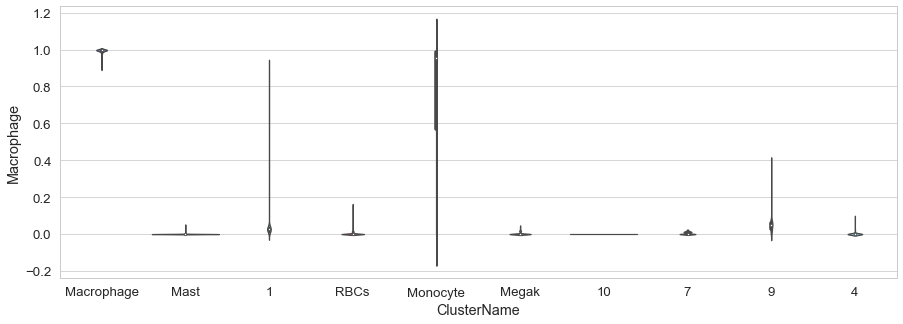

In [6]:
fig, ax = plt.subplots(figsize=(15, 5))
ax = sns.violinplot(x="ClusterName", y="Macrophage", data=df)
plt.show()